In [20]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## **Data Preprocessing**

In [22]:
#Checking for duplicates
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test : ', sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


In [23]:
#Checking for missing values
print('Total number of missing values in train : ', train.isna().values.sum())
print('Total number of missing values in train : ', test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in train :  0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

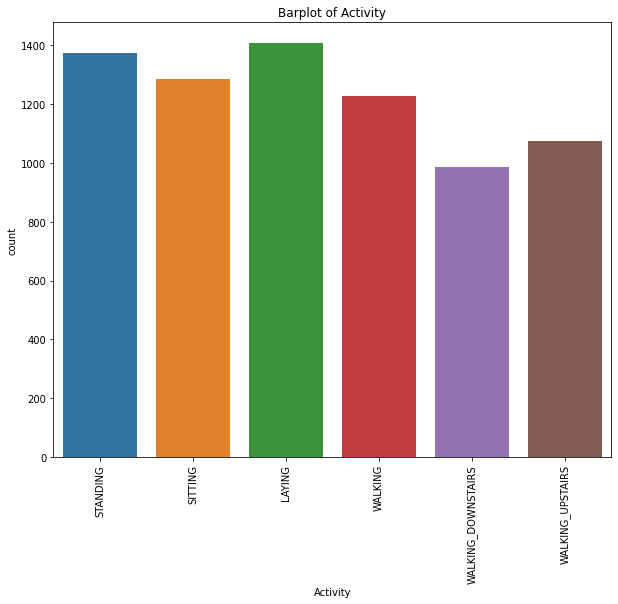

In [24]:
#Checking for class imbalance
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train.Activity)
plt.xticks(rotation=90) #rotate the X-Axis tick labels

#Show the counts of observations in each categorical bin using bars.
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

Text(0.1, 9, 'Dynamic Activities')

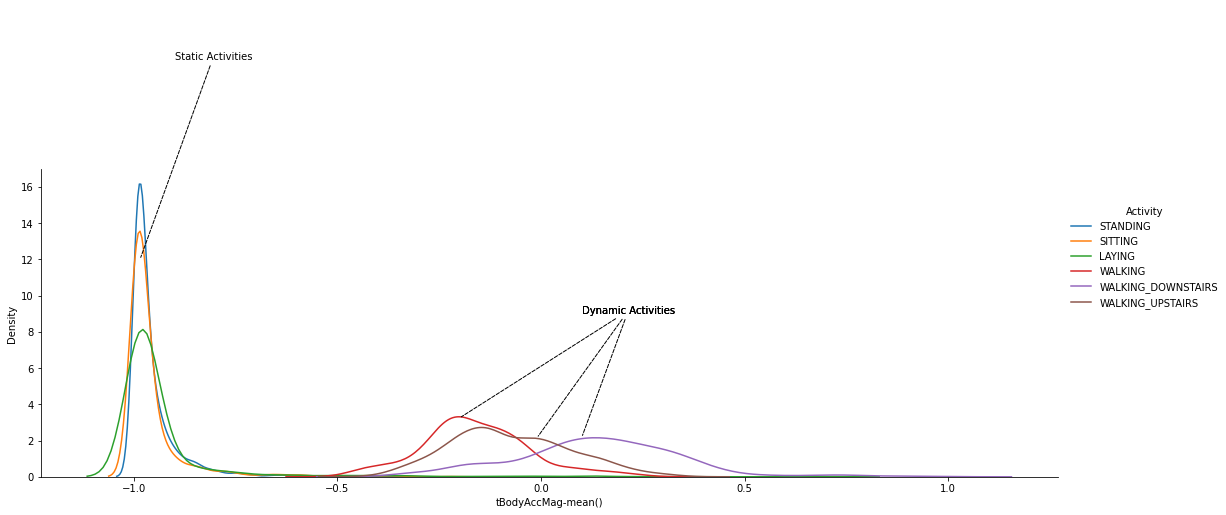

In [25]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5,aspect=3) 
#Apply a plotting function to each facet’s subset of the data.
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Static Activities", xy=(-.996,21), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-.999,26), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.985,12), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

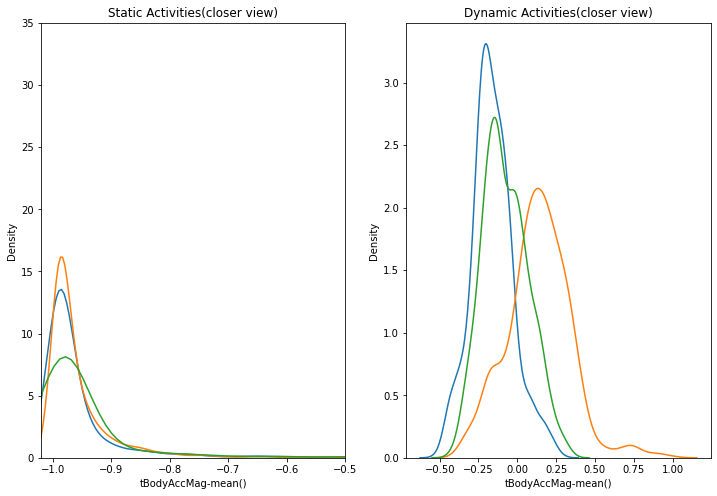

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')

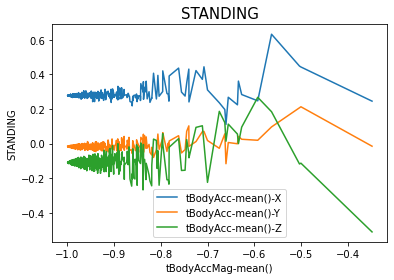

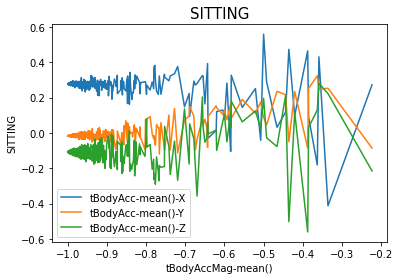

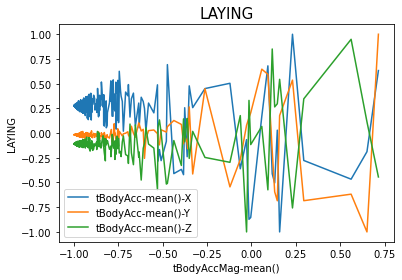

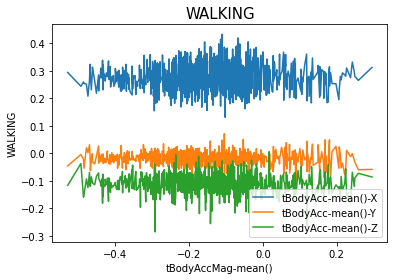

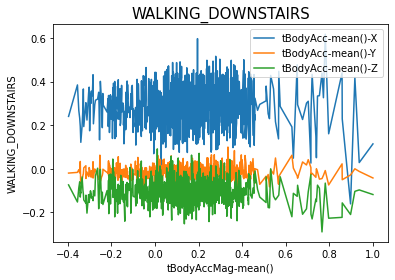

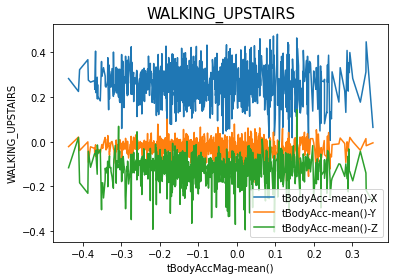

In [27]:
activities = ["STANDING", "SITTING", "LAYING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
for i in activities:
    data36 = train[(train["Activity"] == i)][:1000]
    sns.lineplot(y = "tBodyAcc-mean()-X", x = 'tBodyAccMag-mean()', data = data36)
    sns.lineplot(y = "tBodyAcc-mean()-Y", x = 'tBodyAccMag-mean()', data = data36)
    sns.lineplot(y = "tBodyAcc-mean()-Z", x = 'tBodyAccMag-mean()', data = data36)
    plt.legend(["tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z"])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

# **ML Models**

In [28]:
y_train = train.Activity
X_train = train.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


### **Logistic Regression Model**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [30]:
parameters = {'C':np.arange(10,61,10), 'penalty':['l2','l1']}

"""
C is known as a "hyperparameter." The parameters are numbers that tell the model what to do with the characteristics, 
whereas the hyperparameters instruct the model on how to choose parameters.
Regularization will penalize the extreme parameters, the extreme values in the training data leads to overfitting.
A high value of C tells the model to give more weight to the training data. 
A lower value of C will indicate the model to give complexity more weight at the cost of fitting the data. 
Thus, a high Hyper Parameter value C indicates that training data is more important and reflects the real world data, 
whereas low value is just the opposite of this.
"""
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5,random_state = 42)
"""
estimator : In this we have to pass the metric or the model for which we need to optimize the parameters.
param_distributions : In this we have to pass the dictionary of parameters that we need to optimize.
cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation.
By default is set as five.
So we have defined an object to use RandomizedSearchCV with the important parameters. 
Then we have fitted the train data in it and 
finally with the print statements we can print the optimized values of hyperparameters.
"""
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [31]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.9582626399728538


In [32]:
#function to plot confusion matrix
#The confusion matrix shows the ways in which your classification model
#is confused when it makes predictions.

def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

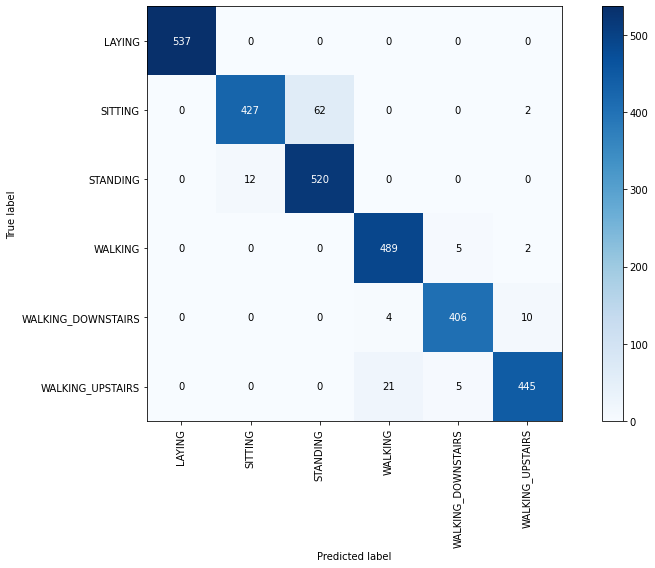

In [33]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))  # plotting confusion matrix

In [34]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [35]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(C=50)
Best set of parameters :  {'penalty': 'l2', 'C': 50}
Best score :  0.9333582134417331


### **Linear SVM Model**

In [36]:
from sklearn.svm import LinearSVC

In [37]:
#The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, 
#returning a "best fit" hyperplane that divides, or categorizes, your data.
#From there, after getting the hyperplane, 
#you can then feed some features to your classifier to see what the "predicted" class is. 

In [38]:
#A hyperplane in an n-dimensional Euclidean space is a flat, 
#n-1 dimensional subset of that space that divides the space into two disconnected parts.

In [39]:
#The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.
#SVMs do is to find a separating line(or hyperplane) between data of two classes. 
#SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible.

In [40]:
parameters = {'C':np.arange(1,12,2)}
lr_svm = LinearSVC(tol=0.00005) #Tolerance for stopping criteria.
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions=parameters,random_state = 42)
lr_svm_rs.fit(X_train, y_train)
y_pred = lr_svm_rs.predict(X_test)

In [41]:
lr_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using linear SVM : ",lr_svm_accuracy)

Accuracy using linear SVM :  0.9660671869697998


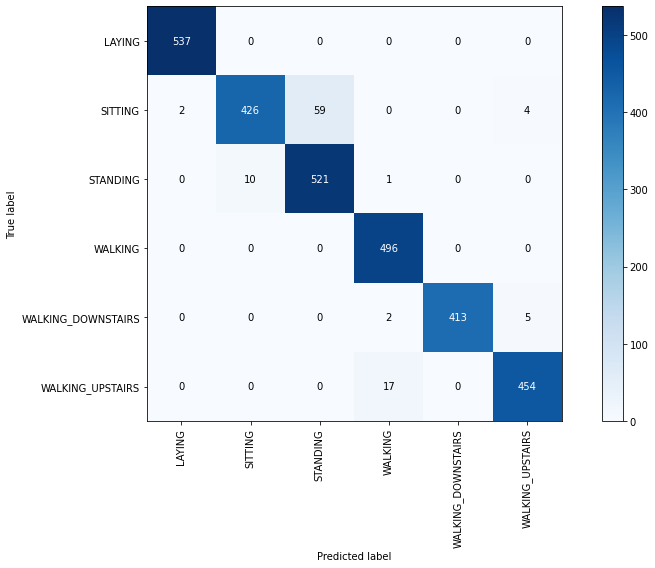

In [42]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [43]:
# getting best random search attributes
get_best_randomsearch_results(lr_svm_rs)

Best estimator :  LinearSVC(C=1, tol=5e-05)
Best set of parameters :  {'C': 1}
Best score :  0.9419277921909757


### **Decision Tree Model**

In [44]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [45]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8693586698337292


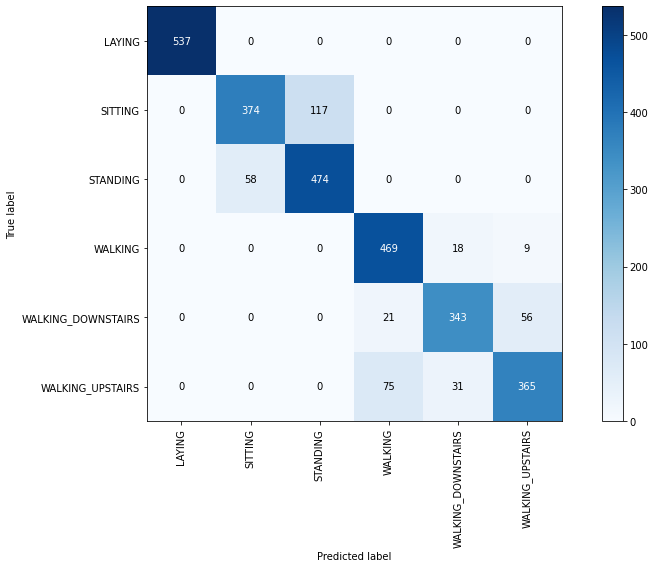

In [46]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [47]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}
Best score :  0.8537893145021433


### **Random Forest Model**

In [48]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [49]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9233118425517476


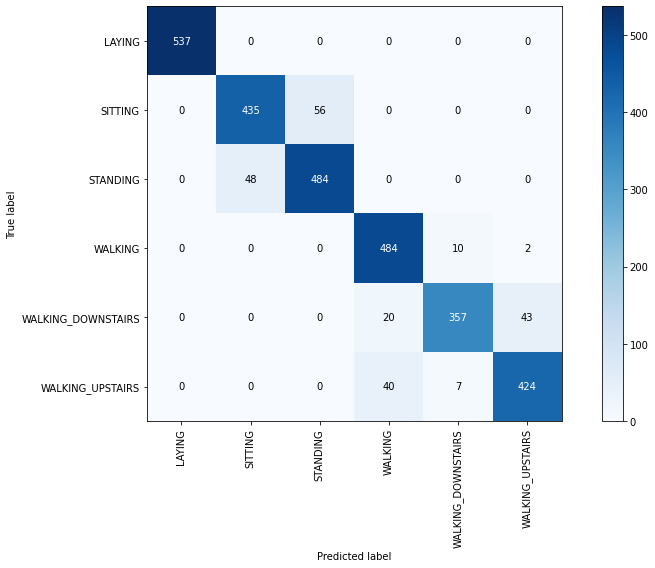

In [50]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [51]:
# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=14, n_estimators=90)
Best set of parameters :  {'n_estimators': 90, 'max_depth': 14}
Best score :  0.9204338757936894


# **Conclusion**

In [52]:
print('\n                     Accuracy ')
print('                     ------------ ')
print('Logistic Regression : {:.04}% '.format(lr_accuracy * 100))
print('Linear SVM :          {:.04}% '.format(lr_svm_accuracy * 100))
print('Decision Tree :       {:.04}% '.format(dt_accuracy * 100))
print('Random Forest :       {:.04}% '.format(rf_accuracy * 100))


                     Accuracy 
                     ------------ 
Logistic Regression : 95.83% 
Linear SVM :          96.61% 
Decision Tree :       86.94% 
Random Forest :       92.33% 
